In [20]:
from copulas.datasets import sample_trivariate_xyz

data = sample_trivariate_xyz()
data.head()

,x,y,z
0,9.004177e-05,2.883992e-06,0.638689
1,8.819273e-01,2.911979e-07,1.058121
2,5.003865e-01,4.886504e-04,0.372506
3,1.838544e-12,5.392802e-02,0.687370
4,1.627915e-01,1.634269e-08,-0.881068


<Axes3DSubplot:>

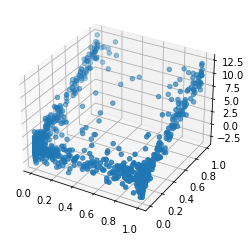

In [21]:
from copulas.visualization import scatter_3d
%matplotlib inline

scatter_3d(data)

In [22]:
from copulas.multivariate import GaussianMultivariate

dist = GaussianMultivariate()
dist.fit(data)

In [23]:
sampled = dist.sample(1000)
sampled.head()

,x,y,z
0,0.068390,0.817850,2.001476
1,0.002363,0.000064,4.537492
2,0.167669,0.022676,1.559460
3,0.000389,0.780513,7.658123
4,0.936664,0.951431,5.861457


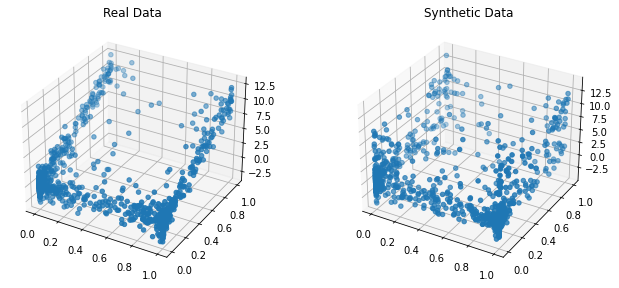

In [24]:
from copulas.visualization import compare_3d

compare_3d(data, sampled)

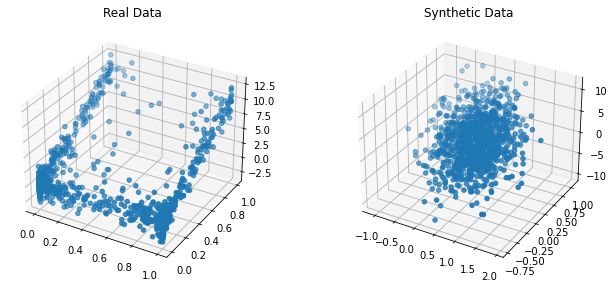

In [25]:
from copulas.univariate import GaussianUnivariate

dist = GaussianMultivariate(distribution=GaussianUnivariate)
dist.fit(data)
sampled = dist.sample(1000)

compare_3d(data, sampled)

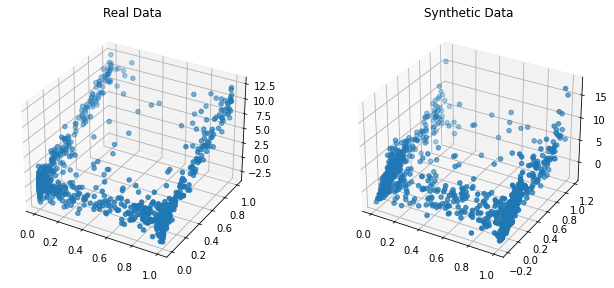

In [26]:
from copulas.univariate import BetaUnivariate, GaussianKDE, GammaUnivariate

dist = GaussianMultivariate(distribution={
    "x": BetaUnivariate,
    "y": GaussianKDE,
    "z": GammaUnivariate
})
dist.fit(data)
sampled = dist.sample(1000)

compare_3d(data, sampled)

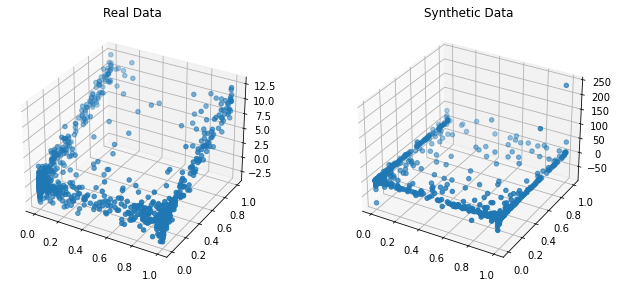

In [27]:
from copulas.univariate import ParametricType, Univariate

univariate = Univariate(parametric=ParametricType.PARAMETRIC)

dist = GaussianMultivariate(distribution=univariate)
dist.fit(data)
sampled = dist.sample(1000)

compare_3d(data,sampled)

In [28]:
probability_dinsity = dist.pdf(sampled)
type(probability_dinsity)

numpy.ndarray

In [29]:
probability_dinsity[0:5]

array([0.01844049, 0.04558936, 0.04072416, 0.02380067, 0.00511681])

In [30]:
cumulative_distribution = dist.cumulative_distribution(sampled)
cumulative_distribution[0:5]

array([0.01487771, 0.0910273 , 0.18870039, 0.0821175 , 0.02661304])

(array([210., 136., 155., 101.,  91.,  91.,  74.,  69.,  53.,  20.]),
 array([4.58201162e-05, 8.92821013e-03, 1.78106001e-02, 2.66929902e-02,
        3.55753802e-02, 4.44577702e-02, 5.33401602e-02, 6.22225502e-02,
        7.11049402e-02, 7.99873302e-02, 8.88697203e-02]),
 <BarContainer object of 10 artists>)

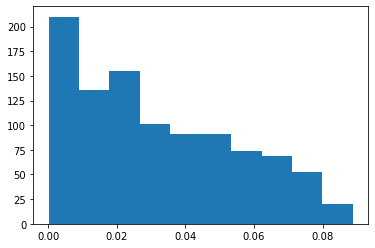

In [31]:
import matplotlib.pyplot as plt
plt.hist(probability_dinsity)

(array([445., 191., 154.,  68.,  56.,  35.,  30.,   9.,   8.,   4.]),
 array([1.55344968e-05, 9.61985273e-02, 1.92381520e-01, 2.88564513e-01,
        3.84747506e-01, 4.80930499e-01, 5.77113491e-01, 6.73296484e-01,
        7.69479477e-01, 8.65662470e-01, 9.61845463e-01]),
 <BarContainer object of 10 artists>)

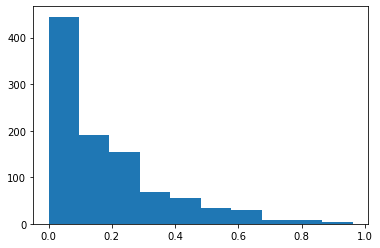

In [32]:
plt.hist(cumulative_distribution)

In [33]:
parameters = dist.to_dict()
parameters.keys()

dict_keys(['covariance', 'univariates', 'columns', 'type'])

In [34]:
parameters["covariance"]

[[1.0, -0.01110314092864995, -0.02684914674347163],
 [-0.01110314092864995, 1.0, 0.7084928530538284],
 [-0.02684914674347163, 0.7084928530538284, 1.0]]

In [36]:
parameters["univariates"]

[{'loc': 1.4182145876906928e-23,
  'scale': 1.0,
  'a': 0.09657613485947586,
  'b': 0.10226371906555595,
  'type': 'copulas.univariate.beta.BetaUnivariate'},
 {'loc': 2.6194208457773113e-49,
  'scale': 0.9999824369833827,
  'a': 0.11353643335098318,
  'b': 0.5621697120496401,
  'type': 'copulas.univariate.beta.BetaUnivariate'},
 {'df': 1.4006628830710697,
  'loc': 0.4691588432897164,
  'scale': 1.247945331065269,
  'type': 'copulas.univariate.student_t.StudentTUnivariate'}]

In [37]:
from copulas.multivariate import Multivariate

new_dist = Multivariate.from_dict(parameters)
new_dist

GaussianMultivariate()

In [38]:
from copulas.multivariate import VineCopula

center = VineCopula('center')
regular = VineCopula('regular')
direct = VineCopula('direct')

center.fit(data)
regular.fit(data)
direct.fit(data)

center_samples = center.sample(1000)
regular_samples = regular.sample(1000)
direct_samples = direct.sample(1000)

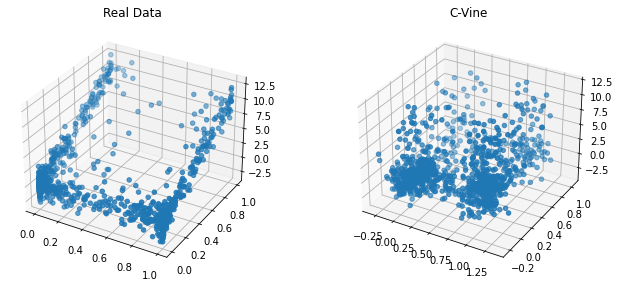

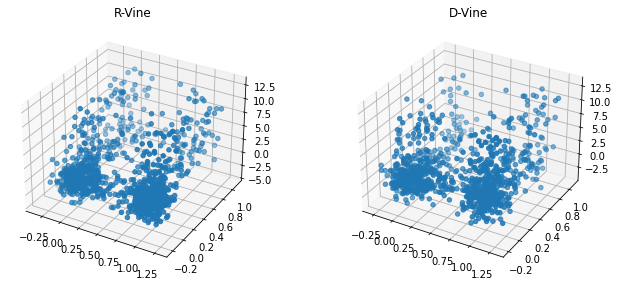

In [39]:
from copulas.visualization import side_by_side

side_by_side(scatter_3d, {'Real Data': data, 'C-Vine': center_samples})
side_by_side(scatter_3d, {'R-Vine': regular_samples, 'D-Vine': direct_samples})